In [1]:
!pip install kaggle

In [2]:
from zipfile import ZipFile

dataset = '/content/archive.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()


In [5]:
import os
path, dirs, files = next(os.walk('/content/train/train'))
file_count = len(files)
print('Numbers of images: ', file_count)


Numbers of images:  25000


In [4]:
file_names = os.listdir('/content/train/train')
print(file_names)

['dog.6020.jpg', 'dog.10782.jpg', 'cat.7539.jpg', 'dog.9013.jpg', 'dog.5439.jpg', 'dog.1058.jpg', 'dog.4068.jpg', 'dog.12498.jpg', 'dog.1385.jpg', 'dog.2874.jpg', 'dog.11733.jpg', 'dog.8157.jpg', 'cat.4612.jpg', 'cat.10396.jpg', 'dog.1320.jpg', 'cat.1755.jpg', 'cat.8098.jpg', 'dog.18.jpg', 'cat.7462.jpg', 'cat.7034.jpg', 'cat.1571.jpg', 'dog.2995.jpg', 'dog.4076.jpg', 'cat.10488.jpg', 'dog.3489.jpg', 'dog.446.jpg', 'cat.9450.jpg', 'cat.10198.jpg', 'dog.11468.jpg', 'cat.5605.jpg', 'dog.2154.jpg', 'dog.1461.jpg', 'dog.3781.jpg', 'dog.132.jpg', 'dog.4414.jpg', 'dog.9208.jpg', 'cat.1698.jpg', 'dog.5333.jpg', 'cat.4067.jpg', 'cat.9213.jpg', 'dog.11729.jpg', 'cat.647.jpg', 'cat.8310.jpg', 'cat.8034.jpg', 'cat.10999.jpg', 'dog.2033.jpg', 'dog.4165.jpg', 'cat.8570.jpg', 'cat.9981.jpg', 'cat.3284.jpg', 'dog.6098.jpg', 'dog.11017.jpg', 'cat.1286.jpg', 'dog.7415.jpg', 'dog.10794.jpg', 'cat.9672.jpg', 'dog.7878.jpg', 'cat.5210.jpg', 'cat.1090.jpg', 'dog.4198.jpg', 'dog.5897.jpg', 'dog.459.jpg', 'd

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

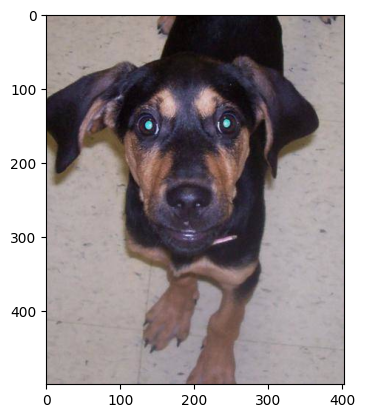

In [2]:
img = mpimg.imread('/content/train/train/dog.11228.jpg')
plt.imshow(img)

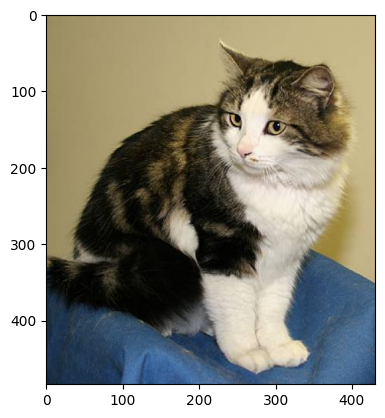

In [3]:
img = mpimg.imread('/content/train/train/cat.8003.jpg')
plt.imshow(img)

In [6]:
file_names = os.listdir('/content/train/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images = ', dog_count)
print('Number of cat images = ', cat_count)

Number of dog images =  12500
Number of cat images =  12500


In [16]:
original_folder = '/content/train/train/'
resized_folder = '/content/imaged_resize/'

for i in range(2000):

  file_name = os.listdir(original_folder)[i]
  img_path = original_folder+file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+file_name
  img.save(newImgPath)

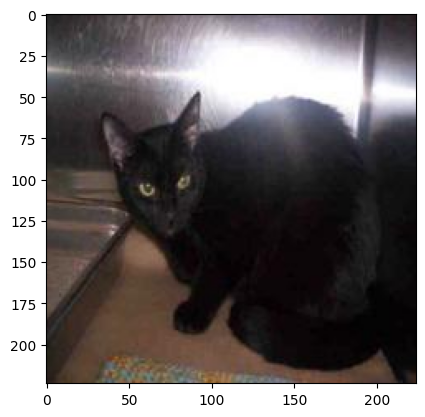

In [7]:
img = mpimg.imread('/content/imaged_resize/cat.7539.jpg')
plt.imshow(img)

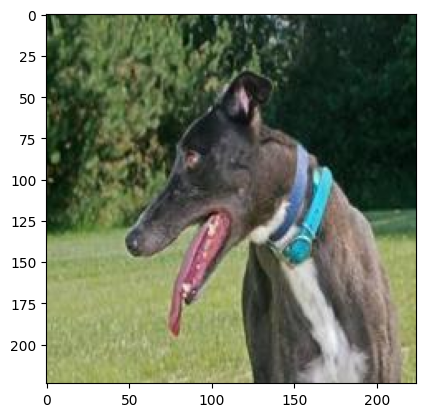

In [8]:
img = mpimg.imread('/content/imaged_resize/dog.9013.jpg')
plt.imshow(img)

In [9]:
filenames = os.listdir('/content/imaged_resize/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label =file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [10]:
print(filenames[0:5])
print(len(filenames))

['dog.6020.jpg', 'dog.10782.jpg', 'cat.7539.jpg', 'dog.9013.jpg', 'dog.5439.jpg']
2000


In [11]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 1]
2000


In [12]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1029  971]


In [13]:
import cv2
import glob

In [14]:
image_directory = '/content/imaged_resize/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [15]:
print(dog_cat_images)

[[[[ 65  98  77]
   [ 65  98  77]
   [ 75 103  84]
   ...
   [ 38  90 102]
   [ 31  78  92]
   [ 37  83 100]]

  [[ 75 108  87]
   [ 71 102  81]
   [ 70  98  79]
   ...
   [ 51 103 115]
   [ 51  97 114]
   [ 42  88 105]]

  [[ 68  99  78]
   [ 69 100  79]
   [ 71  99  80]
   ...
   [ 59 111 124]
   [ 65 111 129]
   [ 42  88 106]]

  ...

  [[ 10  71  67]
   [ 55 115 114]
   [ 79 137 136]
   ...
   [ 82 135 156]
   [ 32  82 102]
   [  3  53  73]]

  [[ 67 132 133]
   [ 46 110 111]
   [ 17  78  82]
   ...
   [ 63 116 137]
   [ 43  93 113]
   [ 27  77  97]]

  [[ 43 110 113]
   [ 23  90  93]
   [ 47 109 117]
   ...
   [129 182 203]
   [127 176 198]
   [ 94 144 164]]]


 [[[ 96 114 143]
   [150 169 196]
   [176 190 218]
   ...
   [ 56  65  55]
   [ 60  64  52]
   [ 73  76  61]]

  [[107 125 154]
   [134 153 180]
   [154 171 198]
   ...
   [ 76  81  72]
   [ 70  72  60]
   [ 75  75  61]]

  [[107 125 154]
   [126 145 172]
   [143 160 187]
   ...
   [118 117 107]
   [105 102  88]
   [103  98

In [16]:
type(dog_cat_images)

numpy.ndarray

In [17]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [18]:
X = dog_cat_images
Y = np.asarray(labels)

In [19]:
print(Y)

[1 1 0 ... 0 1 0]


In [20]:
print(X)

[[[[ 65  98  77]
   [ 65  98  77]
   [ 75 103  84]
   ...
   [ 38  90 102]
   [ 31  78  92]
   [ 37  83 100]]

  [[ 75 108  87]
   [ 71 102  81]
   [ 70  98  79]
   ...
   [ 51 103 115]
   [ 51  97 114]
   [ 42  88 105]]

  [[ 68  99  78]
   [ 69 100  79]
   [ 71  99  80]
   ...
   [ 59 111 124]
   [ 65 111 129]
   [ 42  88 106]]

  ...

  [[ 10  71  67]
   [ 55 115 114]
   [ 79 137 136]
   ...
   [ 82 135 156]
   [ 32  82 102]
   [  3  53  73]]

  [[ 67 132 133]
   [ 46 110 111]
   [ 17  78  82]
   ...
   [ 63 116 137]
   [ 43  93 113]
   [ 27  77  97]]

  [[ 43 110 113]
   [ 23  90  93]
   [ 47 109 117]
   ...
   [129 182 203]
   [127 176 198]
   [ 94 144 164]]]


 [[[ 96 114 143]
   [150 169 196]
   [176 190 218]
   ...
   [ 56  65  55]
   [ 60  64  52]
   [ 73  76  61]]

  [[107 125 154]
   [134 153 180]
   [154 171 198]
   ...
   [ 76  81  72]
   [ 70  72  60]
   [ 75  75  61]]

  [[107 125 154]
   [126 145 172]
   [143 160 187]
   ...
   [118 117 107]
   [105 102  88]
   [103  98

In [21]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape,X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3) (2000,) (1600,) (400,)


In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
print(X_train_scaled)

[[[[1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   ...
   [1.         0.87843137 0.68627451]
   [1.         0.87843137 0.68235294]
   [1.         0.87843137 0.68235294]]

  [[1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   ...
   [1.         0.8745098  0.69411765]
   [1.         0.87843137 0.68627451]
   [1.         0.87843137 0.68627451]]

  [[1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   [1.         0.86666667 0.69411765]
   ...
   [1.         0.87843137 0.70196078]
   [1.         0.87843137 0.70196078]
   [1.         0.87843137 0.70196078]]

  ...

  [[0.25882353 0.52941176 0.44705882]
   [0.1372549  0.40784314 0.3254902 ]
   [0.17254902 0.44705882 0.35686275]
   ...
   [0.23529412 0.52156863 0.43529412]
   [0.2745098  0.55686275 0.47843137]
   [0.18039216 0.4745098  0.38823529]]

  [[0.10980392 0.39215686 0.30196078]
   [0. 

In [42]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt

In [25]:
import tensorflow as tf
import tf_keras
import tensorflow_hub as hub

In [26]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)


In [39]:
print(pretrained_model)

In [27]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_of_classes)

])
#model.add(tf.keras.layers.Dense(num_of_classes))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 16)                20496     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 2278514 (8.69 MB)
Trainable params: 20530 (80.20 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [28]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [29]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 73s 1s/step - loss: 0.1589 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0512 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: 0.0324 - acc: 0.9906
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0228 - acc: 0.9937
Epoch 5/5
50/50 [==============================] - 58s 1s/step - loss: 0.0167 - acc: 0.9975


In [30]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss: ', score)
print('Test Accuracy: ', acc)

13/13 [==============================] - 15s 1s/step - loss: 0.0461 - acc: 0.9750
Test loss:  0.04607956483960152
Test Accuracy:  0.9750000238418579


In [34]:
input_image_path = input('Path of the image to be checked: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image is a cat.')
else:
  print('The image is a dog.')

Output hidden; open in https://colab.research.google.com to view.